In [7]:
# Initial imports
import numpy as np
import pandas as pd
from path import Path
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [8]:
#import and clean the data

data = Path("../Resources/mpg.csv")
df = pd.read_csv(data, na_values='?')


# Drop rows with missing values
df.dropna(inplace=True)

# Drop 'car name' column
df = df.drop(["car name"],1)

df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [9]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [10]:
# Convert 'origin' to a string
df['origin'] = df['origin'].astype(str) 

In [11]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

# Encode Categorical Data

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [13]:
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[["origin"]]))

In [14]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(["origin"])

In [15]:
encode_df.head()

,origin_1,origin_2,origin_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1.0,0.0,0.0


In [17]:
df = df.drop("origin",1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1.0,0.0,0.0


In [18]:
# Train, Test, Split

In [19]:
# Split our preprocessed data into our features and target arrays
y = df["mpg"].values
X = df.drop(["mpg"],1)

In [22]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# Calculate the `mean` and `std` for each feature
X_train.describe().transpose()[['mean', 'std']]

,mean,std
cylinders,5.501730,1.697884
displacement,195.065744,103.898150
horsepower,104.795848,37.822913
weight,2975.494810,848.956590
acceleration,15.482007,2.689554
model year,76.000000,3.540441
origin_1,0.605536,0.489583
origin_2,0.190311,0.393228
origin_3,0.204152,0.403780


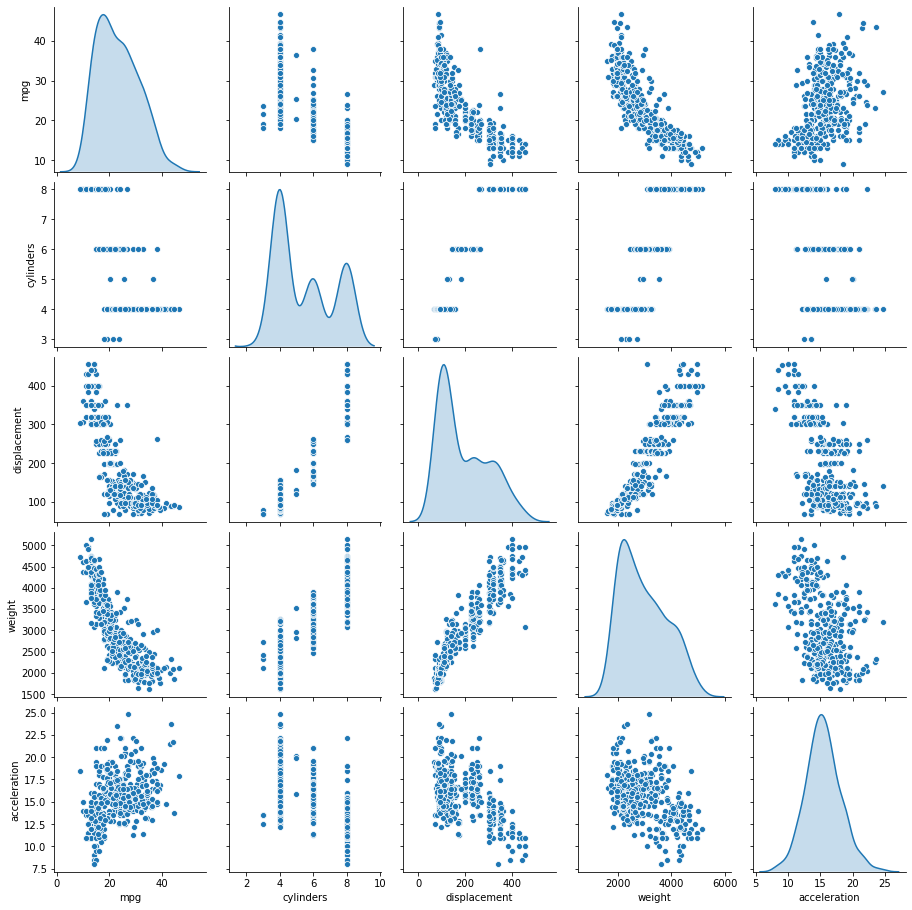

In [24]:
# Bonus: Create a pairplot ot visualize the relationship between the features: 
# ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']], diag_kind='kde')